### Problem Statement:

The goal of this project is to develop a predictive model for estimating insurance charges. The dataset comprises several independent variables, such as age, BMI, smoking status, etc., and the target variable is the insurance charges associated with each individual.

### Dataset Information:
1) Age: Age of Primary Beneficiary   
2) Sex: Insurance Contractor gender (female, male)    
3) BMI: Body Mass Index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9      
4) Children: Number of children covered by health insurance / Number of dependents      
5) Smoker: Whether the individual is a smoker or non-smoker.        
6) Region: The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.        
7) charges: Individual medical costs billed by health insurance


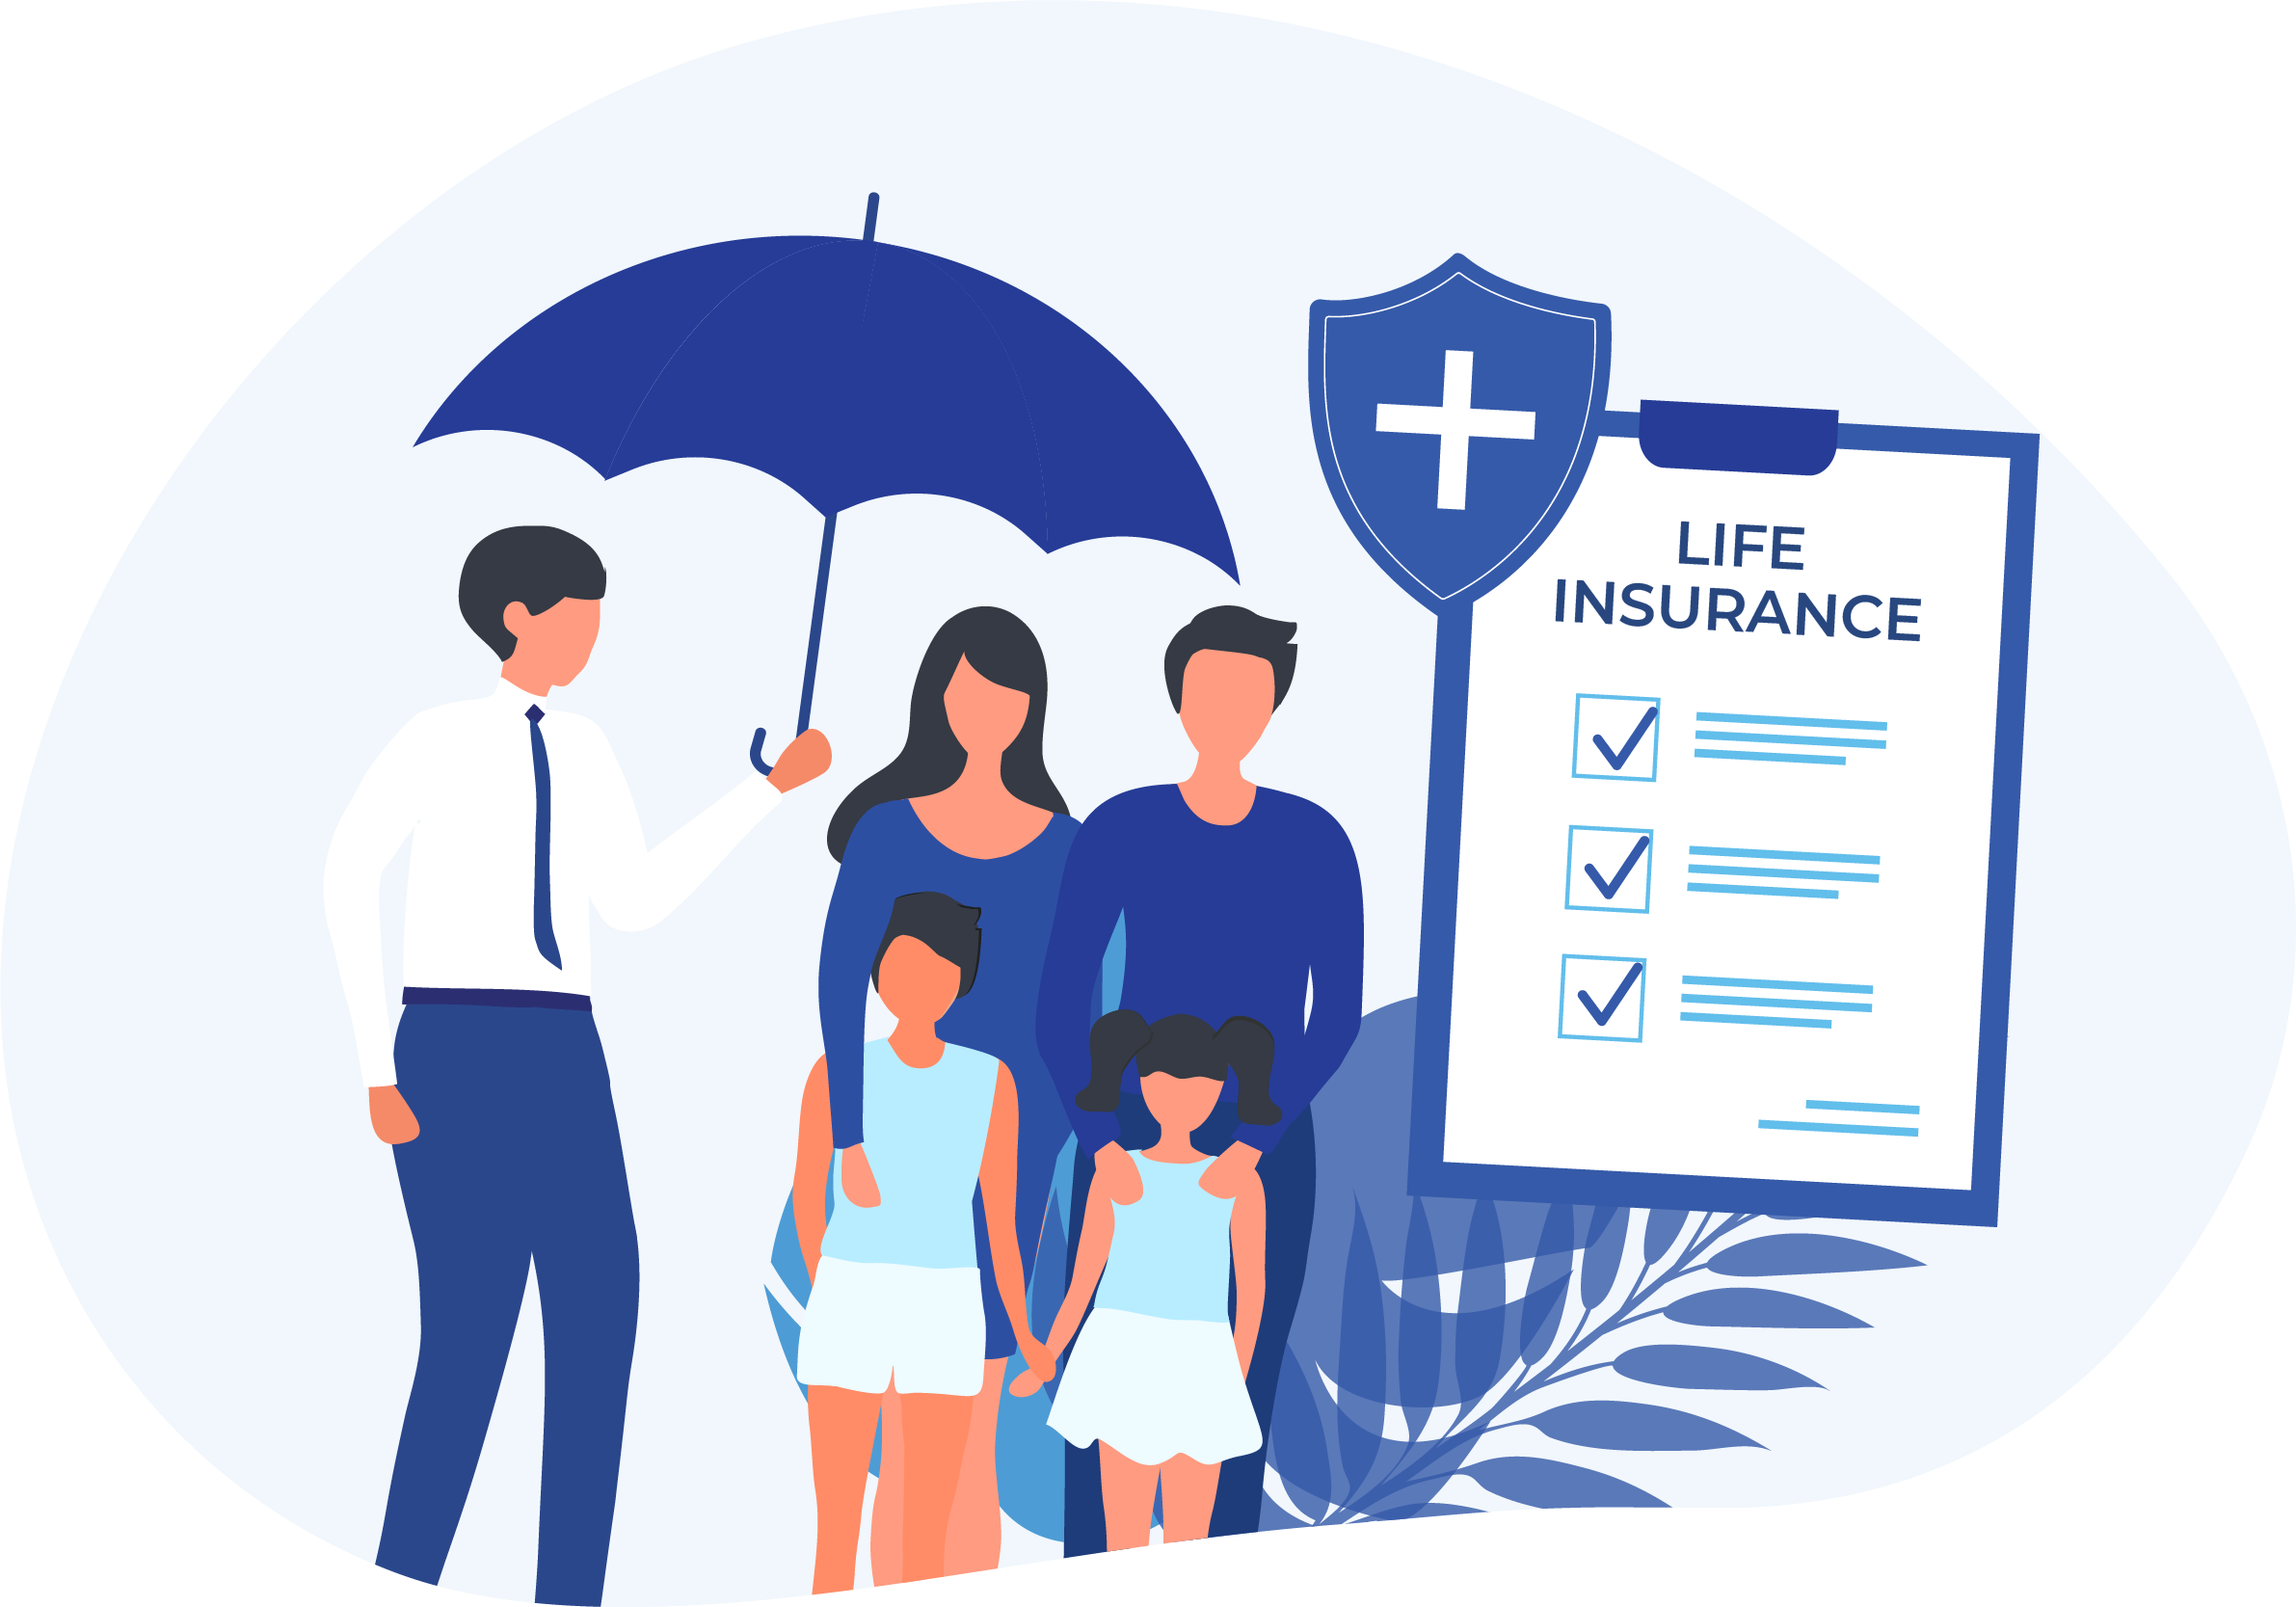

### Step 1: Importing necessary libraries

In [2]:
# Numpy 
import numpy as np
# Pandas 
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn 
import seaborn as sns
# Warning 
from warnings import filterwarnings
filterwarnings('ignore')

### Step 2: Load the Dataset

In [3]:
# Loading insurance dataset
df = pd.read_csv(r"C:\Users\shiva\Documents\Machine Learning\Linear Regression\Project on Insurance\insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [7]:
df.age.nunique()

47

In [8]:
df.age.value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
bins = [0, 30, 40, 50, 60, 100] 
labels = ['0-29', '30-39', '40-49', '50-59', '60+']

df['Age Group'] = pd.cut(df.age, bins=bins, labels=labels, right=False)
df

,age,sex,bmi,children,smoker,region,charges,Age Group
0,19,female,27.900,0,yes,southwest,16884.92400,0-29
1,18,male,33.770,1,no,southeast,1725.55230,0-29
2,28,male,33.000,3,no,southeast,4449.46200,0-29
3,33,male,22.705,0,no,northwest,21984.47061,30-39
4,32,male,28.880,0,no,northwest,3866.85520,30-39
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50-59
1334,18,female,31.920,0,no,northeast,2205.98080,0-29
1335,18,female,36.850,0,no,southeast,1629.83350,0-29
1336,21,female,25.800,0,no,southwest,2007.94500,0-29


In [11]:
df['Age Group'].value_counts()

Age Group
0-29     417
40-49    279
50-59    271
30-39    257
60+      114
Name: count, dtype: int64

In [12]:
df.age.value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

### Step 3: Exploratory Data Analysis

Exploratory Data Analysis (EDA), also known as Data Exploration, it is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In this step, we will perform the below operations:

### 3.1) understanding Your Variables
        3.1.1) Head of the dataset
        3.1.2) The shape of the dataset
        3.1.3) List types of all columns
        3.1.4) Info of the dataset
        3.1.5) Summary of the dataset
        
### 3.2) Data Cleaning
        3.2.1) Checking the Duplicates
        3.2.2) Check the Null values

### 3.1.1) Head of the Dataset

The head() function will tell you the top records in the dataset. By default, python shows you only the top 5 records.

This head(n) function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it. By default it will show 5 rows.

In [13]:
# Display first five records of data
df.head()

,age,sex,bmi,children,smoker,region,charges,Age Group
0,19,female,27.900,0,yes,southwest,16884.92400,0-29
1,18,male,33.770,1,no,southeast,1725.55230,0-29
2,28,male,33.000,3,no,southeast,4449.46200,0-29
3,33,male,22.705,0,no,northwest,21984.47061,30-39
4,32,male,28.880,0,no,northwest,3866.85520,30-39


In [14]:
# Display last five records of the data
df.tail()

,age,sex,bmi,children,smoker,region,charges,Age Group
1333,50,male,30.97,3,no,northwest,10600.5483,50-59
1334,18,female,31.92,0,no,northeast,2205.9808,0-29
1335,18,female,36.85,0,no,southeast,1629.8335,0-29
1336,21,female,25.80,0,no,southwest,2007.9450,0-29
1337,61,female,29.07,0,yes,northwest,29141.3603,60+


### 3.1.2) The Shape of the dataset
This shape() function gives us the **number of rows** and **columns** of the dataset.

In [15]:
# Number of rows and columns
df.shape

(1338, 8)

No of Rows = 1338     
No of Columns = 7

### 3.1.3) List types of all columns 
Using df.dtypes, we get the list of types of all the columns in our dataset.

In [16]:
# list the types of all columns 
df.dtypes

age             int64
sex            object
bmi           float64
children        int64
smoker         object
region         object
charges       float64
Age Group    category
dtype: object

### 3.1.4) Info of the dataset
info() is used to check the information about the data and the datatypes of each respective attribute and also gives you the count.

In [17]:
# Finding out if the dataset contains any null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   object  
 2   bmi        1338 non-null   float64 
 3   children   1338 non-null   int64   
 4   smoker     1338 non-null   object  
 5   region     1338 non-null   object  
 6   charges    1338 non-null   float64 
 7   Age Group  1338 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.8+ KB


### 3.1.5) Summary of the dataset

The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

In [18]:
# Statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Numerical Features

In [19]:
df.dtypes[df.dtypes!='object'].index

Index(['age', 'bmi', 'children', 'charges', 'Age Group'], dtype='object')

In [20]:
[features  for features in df.dtypes[df.dtypes!='object'].index]

['age', 'bmi', 'children', 'charges', 'Age Group']

In [21]:
num_features = df.dtypes[df.dtypes!='object'].index
num_features

Index(['age', 'bmi', 'children', 'charges', 'Age Group'], dtype='object')

In [22]:
# No of Numerical Features
len(num_features)

5

In [23]:
# Summarize numerical features
df[num_features].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Distribution of Categorical Features

In [24]:
cat_features = df.dtypes[df.dtypes == 'object'].index
cat_features

Index(['sex', 'smoker', 'region'], dtype='object')

In [25]:
len(cat_features)

3

In [26]:
df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Check the Unique Lables in the categorical variables

In [27]:
# Check the unique lables of the 'sex' variable
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [28]:
# Print the no of counts for sex variable
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [29]:
# Check the unique lables of the 'smoker' variable
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [30]:
# check the no of counts for smoker  variable
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [31]:
# Check the unique lables of the 'region' variable
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [32]:
# check the no of counts for region variable
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [33]:
# or you can run this through for loop

for i in df.columns:
    print("Feature Name = ",i)
    print(df[i].unique(),'\n')
    print(i,'------->',df[i].nunique(),'\n')

Feature Name =  age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] 

age -------> 47 

Feature Name =  sex
['female' 'male'] 

sex -------> 2 

Feature Name =  bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.59

### 3.2) Data Cleaning

#### 3.2.1) Drop the Duplicates
check is there any duplicates rows are exist then we should remove from the dataframe.

In [34]:
# check the shape before drop the duplicates
df.shape

(1338, 8)

In [35]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,Age Group
581,19,male,30.59,0,no,northwest,1639.5631,0-29


In [36]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges,Age Group
0,19,female,27.900,0,yes,southwest,16884.92400,0-29
1,18,male,33.770,1,no,southeast,1725.55230,0-29
2,28,male,33.000,3,no,southeast,4449.46200,0-29
3,33,male,22.705,0,no,northwest,21984.47061,30-39
4,32,male,28.880,0,no,northwest,3866.85520,30-39
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50-59
1334,18,female,31.920,0,no,northeast,2205.98080,0-29
1335,18,female,36.850,0,no,southeast,1629.83350,0-29
1336,21,female,25.800,0,no,southwest,2007.94500,0-29


In [37]:
df=df.drop_duplicates()

In [38]:
df.shape

(1337, 8)

In [39]:
df = df.reset_index(drop=True)

In [40]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,Age Group
1332,50,male,30.97,3,no,northwest,10600.5483,50-59
1333,18,female,31.92,0,no,northeast,2205.9808,0-29
1334,18,female,36.85,0,no,southeast,1629.8335,0-29
1335,21,female,25.80,0,no,southwest,2007.9450,0-29
1336,61,female,29.07,0,yes,northwest,29141.3603,60+


You can see there is one duplicates data so we dropped duplicated data      
before the no of records = 1338         
after droping the duplicates the no of records =1337

### 3.2.2) Check the Null Values

Using .isnull.sum() function we can see the null values present in the every column in the dataset.

In [41]:
# Count of null values
# Check the missing values in any column 
# Display number of null values in every column in dataset

df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
Age Group    0
dtype: int64

There is no null values in the given dataset.

### 4) Data Visualization

#### 4.1) Histograms (univariate analysis)

Histograms are one of the most common graphs used to display numeric data.   
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

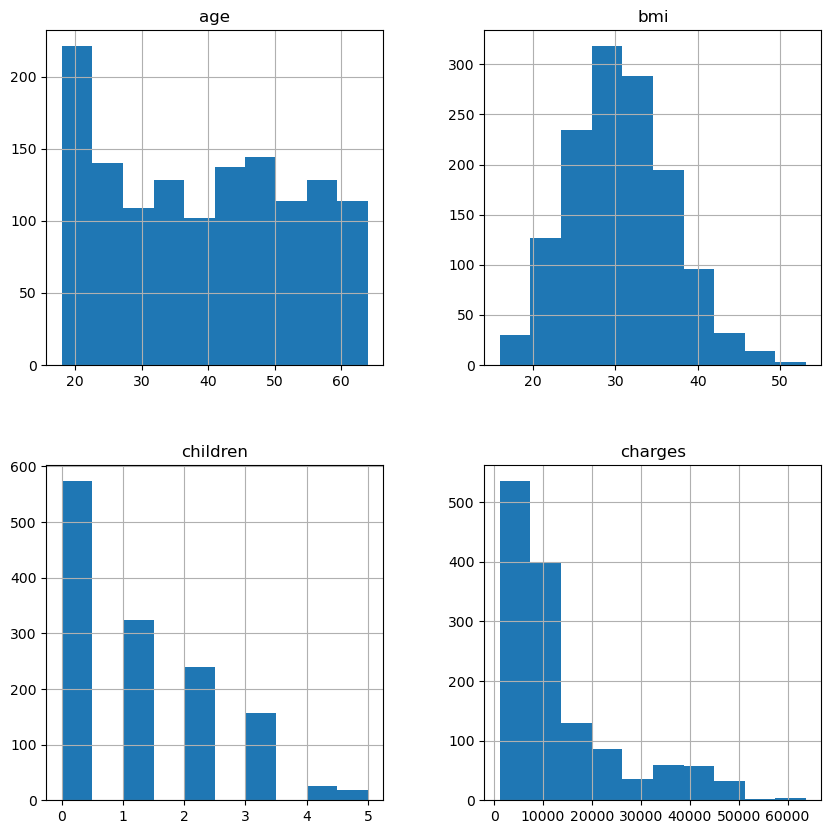

In [42]:
# Histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

### Will use Log Transformation for charges to convert right skewed into normal distribution

Transformation techniques are used to modify the variables in a dataset to meet certain assumptions or improve the performance of a statistical model.

<Axes: >

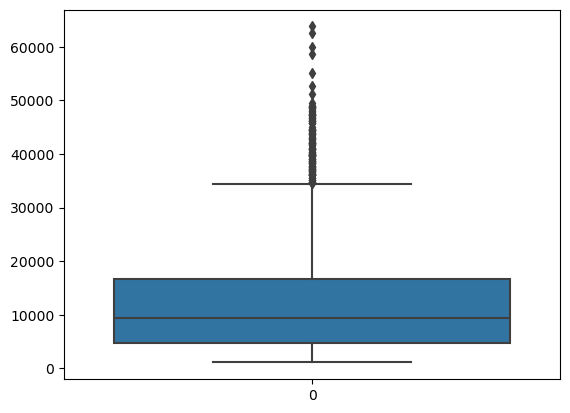

In [43]:
sns.boxplot(df.charges)

<Axes: xlabel='charges', ylabel='Density'>

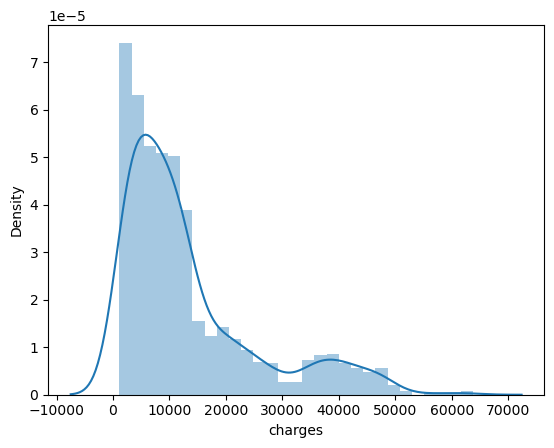

In [44]:
sns.distplot(df.charges)

In [45]:
# Performing log operation
np.log(68000)

11.127262984158243

In [46]:
# Performing anti log operation (using exponential)
np.exp(11.127262984158243)

67999.99999999994

<Axes: xlabel='charges', ylabel='Density'>

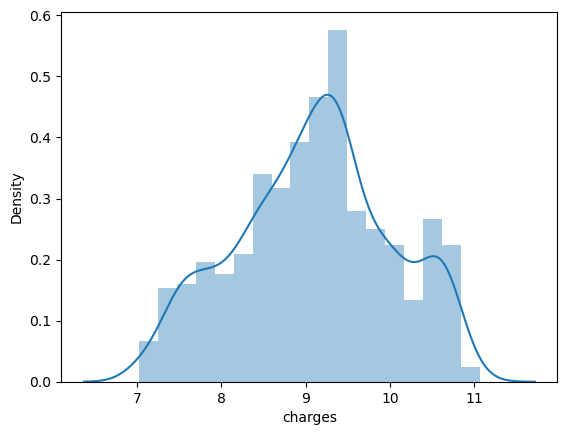

In [47]:
sns.distplot(np.log(df['charges']))

In [48]:
new_df=df.copy()

In [49]:
new_df['charges']=np.log(df['charges'])

In [50]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges,Age Group
0,19,female,27.900,0,yes,southwest,9.734176,0-29
1,18,male,33.770,1,no,southeast,7.453302,0-29
2,28,male,33.000,3,no,southeast,8.400538,0-29
3,33,male,22.705,0,no,northwest,9.998092,30-39
4,32,male,28.880,0,no,northwest,8.260197,30-39


#### 4.3) Scatter plot (bivariate analysis)
A Scatterplot is a type of graph which 'plots' the values along two axes, like age and height. Scatterplots are useful for many reasons. like correlation matrices, It allows you to quickly understand a relationship between two variables.

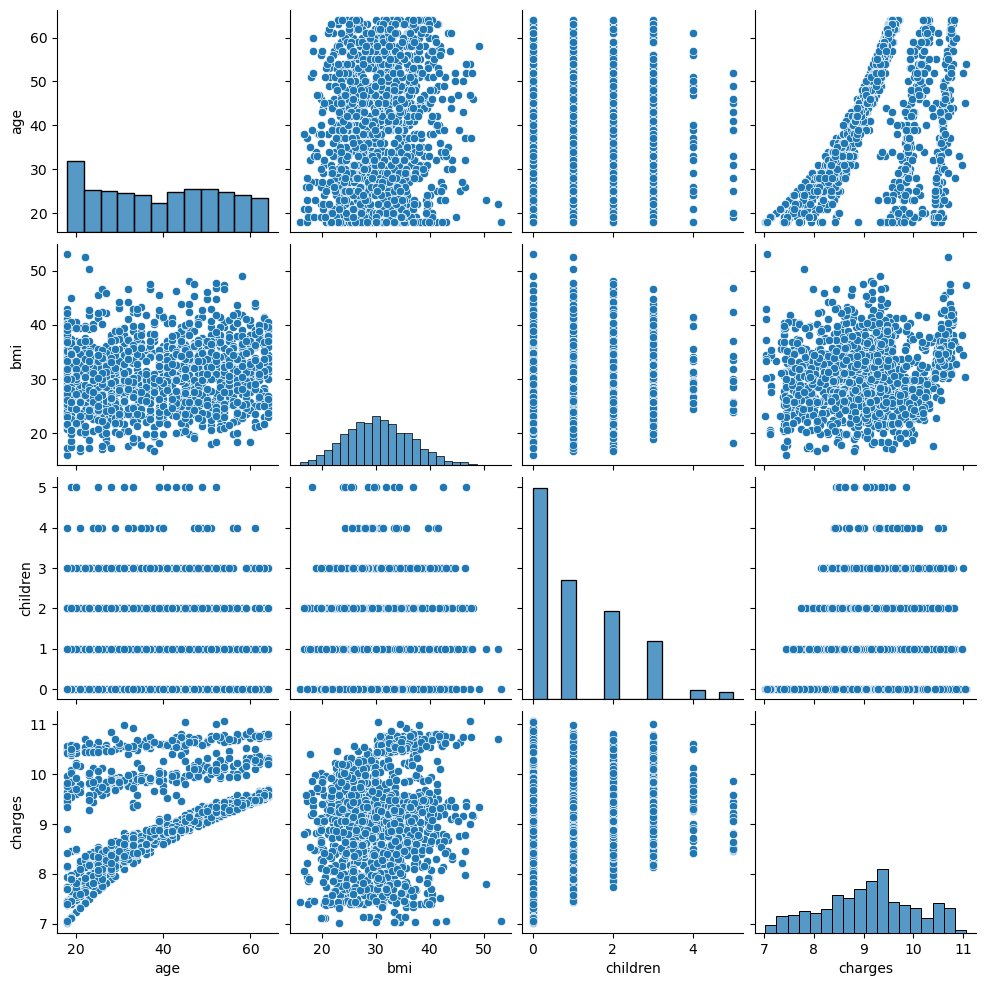

In [51]:
# pairplot matrix    (for multiple scatter plot we use pairplot)
sns.pairplot(new_df)

-- --------------------------------------------- EDA ---------------------------------------------

In [52]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age Group'],
      dtype='object')

In [53]:
df.groupby(['children'])['charges'].mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

### Feature Engineering

#### Converting Categorical variable to Numerical Variable

#### Apply ''get_dummies()'' Method

This is one of the approach and also an each one to encode Categorical data. pandas get_dummies() method takes categorical feature as an argument. Then it creates a Dummy variable for every label in the feature, such that each dummy variable holds data as 1 or 0.         
1 indicates the presence of a particular label and 0 indicates the absence of a particular label.

For example, if a feature contains labels as Male and Female. After applying pandas get_dummies() to that feature, Dummy variable for both Male and Female labels are created. i.e., Dummy variables are created for every label in the feature. So that those Dummy variables holds 1 in the presence of that label and as 0 in the absence of that label.

In [54]:
new_df.head()

,age,sex,bmi,children,smoker,region,charges,Age Group
0,19,female,27.900,0,yes,southwest,9.734176,0-29
1,18,male,33.770,1,no,southeast,7.453302,0-29
2,28,male,33.000,3,no,southeast,8.400538,0-29
3,33,male,22.705,0,no,northwest,9.998092,30-39
4,32,male,28.880,0,no,northwest,8.260197,30-39


In [55]:
pd.get_dummies(new_df,drop_first=True).astype('int')

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,19,27,0,9,0,1,0,0,1,0,0,0,0
1,18,33,1,7,1,0,0,1,0,0,0,0,0
2,28,33,3,8,1,0,0,1,0,0,0,0,0
3,33,22,0,9,1,0,1,0,0,1,0,0,0
4,32,28,0,8,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,30,3,9,1,0,1,0,0,0,0,1,0
1333,18,31,0,7,0,0,0,0,0,0,0,0,0
1334,18,36,0,7,0,0,0,1,0,0,0,0,0
1335,21,25,0,7,0,0,0,0,1,0,0,0,0


In [56]:
df3 = pd.get_dummies(new_df,drop_first=True).astype('int')

In [57]:
df3

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,19,27,0,9,0,1,0,0,1,0,0,0,0
1,18,33,1,7,1,0,0,1,0,0,0,0,0
2,28,33,3,8,1,0,0,1,0,0,0,0,0
3,33,22,0,9,1,0,1,0,0,1,0,0,0
4,32,28,0,8,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,30,3,9,1,0,1,0,0,0,0,1,0
1333,18,31,0,7,0,0,0,0,0,0,0,0,0
1334,18,36,0,7,0,0,0,1,0,0,0,0,0
1335,21,25,0,7,0,0,0,0,1,0,0,0,0


In [58]:
df3.shape

(1337, 13)

In [59]:
df3.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,19,27,0,9,0,1,0,0,1,0,0,0,0
1,18,33,1,7,1,0,0,1,0,0,0,0,0
2,28,33,3,8,1,0,0,1,0,0,0,0,0
3,33,22,0,9,1,0,1,0,0,1,0,0,0
4,32,28,0,8,1,0,1,0,0,1,0,0,0


### 5) Split the dataframe into X & y

In [60]:
# Separate object for Predictors 
X = df3.drop('charges',axis=1)

# Separate object for target feature 
y = df3['charges']

In [61]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,19,27,0,0,1,0,0,1,0,0,0,0
1,18,33,1,1,0,0,1,0,0,0,0,0
2,28,33,3,1,0,0,1,0,0,0,0,0
3,33,22,0,1,0,1,0,0,1,0,0,0
4,32,28,0,1,0,1,0,0,1,0,0,0


In [62]:
y.head()

0    9
1    7
2    8
3    9
4    8
Name: charges, dtype: int32

In [63]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (1337, 12) 
y Shape = (1337,)


### 6) Train Test Split

In [64]:
X.shape[0]

1337

In [65]:
round(1337*.80,0)

1070.0

In [66]:
1337 - 1070

267

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [68]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
435,60,33,3,1,0,0,1,0,0,0,0,1
202,60,24,0,0,0,1,0,0,0,0,0,1
1182,48,27,1,0,0,0,0,0,0,1,0,0
1290,19,34,0,1,1,0,0,1,0,0,0,0
772,19,28,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
715,49,22,1,0,0,1,0,0,0,1,0,0
905,27,32,3,1,0,0,0,0,0,0,0,0
1096,22,33,0,1,0,0,1,0,0,0,0,0
235,40,22,2,0,1,0,1,0,0,1,0,0


In [69]:
y_train

435      9
202      9
1182     9
1290    10
772      9
        ..
715      9
905      8
1096     7
235      9
1061    10
Name: charges, Length: 1069, dtype: int32

In [70]:
X_train.shape,y_train.shape

((1069, 12), (1069,))

In [71]:
X_test.shape,y_test.shape

((268, 12), (268,))

### 7) Build the Regression Algorithm

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

### Evaluation Metrics

In [73]:
# Train Score
train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.70170025254889


In [74]:
# Evaluating the model for both train and test data
y_pred_train = lr.predict(X_train)      # ----- i am going to predict y_train
y_pred_test = lr.predict(X_test)        # ------ i am going to predict y_test

In [75]:
from sklearn.metrics import r2_score

train_score = r2_score(y_train,y_pred_train)
test_score = r2_score(y_test,y_pred_test)

print(f'Training Accuracy = {train_score}\nTesting Accuracy = {test_score}')

Training Accuracy = 0.70170025254889
Testing Accuracy = 0.7357345661989159


In [76]:
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.7357345661989159


In [77]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges,Age Group
0,19,female,27.90,0,yes,southwest,16884.9240,0-29
1,18,male,33.77,1,no,southeast,1725.5523,0-29


In [78]:
y_test

628     10
1086     9
283      9
789      8
593      8
        ..
1163     8
961      9
1157     7
1240    10
216      9
Name: charges, Length: 268, dtype: int32

In [79]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 0.3605101025810883
Mean Squared Error = 0.23764167741067643
Root Mean Squared Error = 0.4874850535254147


#### I have used log transformation to convert right skewed data into normal distribution  so we are using exp to convert into antilog

In [80]:
# To find the intercept 
print('Intercept =',np.exp(lr.intercept_))

Intercept = 566.9237263088993


In [81]:
# To find the co-efficients
print('coefficients =',np.exp(lr.coef_))

coefficients = [1.04613609 1.01424676 1.10776542 0.90713242 4.14073143 0.88922488
 0.85525702 0.89175011 0.79918488 0.7873916  0.83443518 0.5801387 ]


In [82]:
pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(y_pred),'Variance':np.exp(y_test)-np.exp(y_pred)})

,Actual,Predicted,Variance
628,22026.465795,20471.143877,1555.321918
1086,8103.083928,7737.107016,365.976912
283,8103.083928,9847.168385,-1744.084458
789,2980.957987,4018.801148,-1037.843161
593,2980.957987,3875.640374,-894.682387
...,...,...,...
1163,2980.957987,4152.522779,-1171.564792
961,8103.083928,8763.621595,-660.537668
1157,1096.633158,2135.979950,-1039.346791
1240,22026.465795,38691.092131,-16664.626336


### Feature Selection 

#### Few Advandates of Feature Selection:
    1) Faster training time
    2) Decrease in complexity
    3) Improved accuracy and performance
    4) Over-fitting 

### Building optimal model using 'Backward Elimination Method'

When we're building a Machine Learning model, it is very important that we select only those features or predictors which are necessary.     
Suppose we have 50 features or predictors in our dataset.That doesn't mean that we need to have all 50 features in our model.

There are various ways in which you can find out which features have very little impact on the model and which ones you can remove from your dataset.

A simialr idea can be applied in Backward Elimination -- weather a feature significantly impacts the output or not.    
A **P-Value** helps determine weather a hypothesis must be **accepted or rejected**

### Backward Elimination Method Procedure

#### Step 1
The first step in backward elimination is **select a significance level**, or **select the p_value**.     
Usually, in most cases, a 5% significance level is selected. This means the P-Value will be 0.05. You can change this value depending on the problem statement (domain)

#### Step 2
The second step is **fit your machine learning model with all the features selected.**    
So if there are 50 features. you include all of them in your model and fit the model on your test dataset. No changes here.

#### Step 3
In step 3, identify the feature or predictor which has the higest P-Value.

#### Step 4
This is a significant step, Here, we take decisions. In the previous step 3, we identified the feature which has the highest P-value.     
If the p-value of this feature is greater than the significance level we selected and remove this feature from our dataset.      
If the p-value of this feature is less than the significance level, we'll just jump to step 6, which means that we're done.

#### Step 5
Once we find out the feautre which has to be removed from the dataset and we'll fit the model again with the new dataset. After fitting the model for the new dataset, we'll jump back to step3.

This process continues until we reach a point in step 4 where the highest p-value from all the remaining features in the dataset is less than the significance selected in step 1.

In our example, this means we iterate from step 3 to step 5 and back till the highest p-value in the dataset is less than 0.05.

Out of 50 assumed features, we might filter out a best 10 features.

#### Step 6
Once we reach step 6, we're done with the feature selection process. We have successfully used backward elimination to filter out features.

### Importing Libraries to Build OLS Model

In [83]:
# Needed libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

### Train and Test Split

In [84]:
# Now, split data into train and test in approx 70:30 ratio
round(1337*.7,0)

936.0

In [85]:
ols_train = new_df.iloc[0:937, ]
ols_test = new_df.iloc[937:1338, ]

In [86]:
ols_train.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age Group'],
      dtype='object')

In [87]:
ols_train.shape

(937, 8)

In [88]:
ols_train

,age,sex,bmi,children,smoker,region,charges,Age Group
0,19,female,27.900,0,yes,southwest,9.734176,0-29
1,18,male,33.770,1,no,southeast,7.453302,0-29
2,28,male,33.000,3,no,southeast,8.400538,0-29
3,33,male,22.705,0,no,northwest,9.998092,30-39
4,32,male,28.880,0,no,northwest,8.260197,30-39
...,...,...,...,...,...,...,...,...
932,45,female,35.300,0,no,southwest,8.902203,40-49
933,32,male,37.180,2,no,southeast,8.449640,30-39
934,59,female,27.500,0,no,southwest,9.411960,50-59
935,44,male,29.735,2,no,northeast,10.376881,40-49


In [89]:
model_1 = smf.ols(formula='charges ~ age + bmi + children + smoker + region',data = ols_train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     478.4
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          6.48e-303
Time:                        14:53:51   Log-Likelihood:                -539.35
No. Observations:                 937   AIC:                             1095.
Df Residuals:                     929   BIC:                             1133.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.9259    

Null Hypothesis (Ho) = Independent variable is not linear to the target variable            
Null Hypothesis (H1) = Independent variable is linear to the target variable

### Observation

From the summary, we observe that the higest P-value is for region[T.northwest] = 0.106, which is way over our significance level of 0.05, Hence we remove region[T.northwest] feature.

In [90]:
df3.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,19,27,0,9,0,1,0,0,1,0,0,0,0
1,18,33,1,7,1,0,0,1,0,0,0,0,0


In [91]:
ols_train1 = df3.iloc[0:937, ]
ols_test1 = df3.iloc[937:1338, ]

In [92]:
ols_train1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,19,27,0,9,0,1,0,0,1,0,0,0,0
1,18,33,1,7,1,0,0,1,0,0,0,0,0
2,28,33,3,8,1,0,0,1,0,0,0,0,0
3,33,22,0,9,1,0,1,0,0,1,0,0,0
4,32,28,0,8,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,45,35,0,8,0,0,0,0,1,0,1,0,0
933,32,37,2,8,1,0,0,1,0,1,0,0,0
934,59,27,0,9,0,0,0,0,1,0,0,1,0
935,44,29,2,10,1,0,0,0,0,0,1,0,0


In [93]:
ols_train1.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,19,27,0,9,0,1,0,0,1,0,0,0,0
1,18,33,1,7,1,0,0,1,0,0,0,0,0
2,28,33,3,8,1,0,0,1,0,0,0,0,0
3,33,22,0,9,1,0,1,0,0,1,0,0,0
4,32,28,0,8,1,0,1,0,0,1,0,0,0


In [94]:
model_2 = smf.ols(formula='charges ~ age + bmi + children + sex_male + smoker_yes  + region_southeast + region_southwest',data = ols_train1).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     347.1
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          3.28e-254
Time:                        14:53:51   Log-Likelihood:                -676.23
No. Observations:                 937   AIC:                             1368.
Df Residuals:                     929   BIC:                             1407.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.4333      0.095  

In [95]:
new_ols_test1=ols_test1.copy()

In [96]:
new_ols_test1.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'Age Group_30-39', 'Age Group_40-49', 'Age Group_50-59',
       'Age Group_60+'],
      dtype='object')

In [97]:
y_test = new_ols_test1['charges']

In [98]:
X_test=new_ols_test1.loc[:,['age','bmi','children','sex_male','smoker_yes','region_southeast','region_southwest']]

In [99]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_southeast,region_southwest
937,18,26,2,1,0,1,0
938,53,29,0,1,0,1,0
939,18,23,0,1,0,1,0
940,50,46,1,0,0,1,0
941,18,40,0,0,0,0,0


### 2. Predict the values using test set

In [100]:
model_2_prediction = model_2.predict(X_test)

In [101]:
model_2_prediction.head()

937    7.425001
938    8.628831
939    7.205351
940    8.878639
941    7.559969
dtype: float64

### 3. Compute accuracy measures

Now we calculate accuray measures Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [102]:
from statsmodels.tools.eval_measures import rmse


# calculate rmse using rmse()
model2_rmse = rmse(y_test, model_2_prediction)

# calculate R-squared using rsquared
model2_rsquared = model_2.rsquared

# calculate Adjusted R-Squared using rsquared_adj
model2_rsquared_adj = model_2.rsquared_adj 

In [103]:
print('model2_rmse =',model2_rmse)
print('model2_rsquared =',model2_rsquared)
print('model2_rsquared_adj =',model2_rsquared_adj)

model2_rmse = 0.556809285892014
model2_rsquared = 0.7234333717501276
model2_rsquared_adj = 0.7213494466718184


In [104]:
final_Result = pd.DataFrame({'Actual':np.exp(y_test),'Predicted':np.exp(model_2_prediction),'Residuals':(np.exp(y_test)-np.exp(model_2_prediction))})
final_Result.head()

,Actual,Predicted,Residuals
937,1096.633158,1677.400686,-580.767527
938,8103.083928,5590.536366,2512.547561
939,1096.633158,1346.616955,-249.983796
940,8103.083928,7177.015115,926.068813
941,1096.633158,1919.786398,-823.153240


### Feature Scaling is Require for Linear Regression

Feature scaling is a preprocessing step in machine learning that involves transforming features to a similar scale. This is often done to ensure that certain features do not dominate others in the learning process.

**Standardization (standard scaler)**: This technique scales the data to have a mean of zero and standard deviation of one. The formula for standardization is (x-mean)/standard deviation.

**Min-Max Scaling (Min-Max Scaler) (Normalization)**: This technique scales the data to a range between 0 and 1. The formula for min-max scaling is (x-min)/(max-min).

**StandardScaler:**

Use StandardScaler when your data does not have a specific range or when the range is not important for your algorithm.
1. It is appropriate when your data approximately follows a Gaussian distribution (or a bell-shaped curve).
2. It is less sensitive to outliers compared to MinMaxScaler.               
Some algorithms, such as linear regression, logistic regression, and support vector machines, assume that the features are normally distributed and centered around zero. In such cases, StandardScaler is a good choice.

**MinMaxScaler:**

Use MinMaxScaler when you want to scale the data to a specific range, typically between 0 and 1.
1. It is useful when you have prior knowledge or domain expertise that suggests the features should have a specific bounded range.
2. It preserves the original shape of the distribution                 
Some usecase where the image pixcel size should be in the range between 0 to 1 at that time we use minmaxscaler is used

**Note:**
    we should apply scaling technique only for numerical data not for categorical data

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [106]:
X_train.shape,y_train.shape

((1069, 12), (1069,))

In [107]:
y_train.shape,y_test.shape

((1069,), (268,))

In [108]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
435,60,33,3,1,0,0,1,0,0,0,0,1
202,60,24,0,0,0,1,0,0,0,0,0,1
1182,48,27,1,0,0,0,0,0,0,1,0,0
1290,19,34,0,1,1,0,0,1,0,0,0,0
772,19,28,0,0,1,1,0,0,0,0,0,0


In [109]:
num_data = X_train[['age','bmi']]
num_data

,age,bmi
435,60,33
202,60,24
1182,48,27
1290,19,34
772,19,28
...,...,...
715,49,22
905,27,32
1096,22,33
235,40,22


In [110]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(num_data)

# Print the original data and the scaled data
print("\nScaled Data:\n", scaled_data)


Scaled Data:
 [[ 1.48940652  0.47648209]
 [ 1.48940652 -1.01675379]
 [ 0.63151478 -0.5190085 ]
 ...
 [-1.22725064  0.47648209]
 [ 0.05958696 -1.34858399]
 [ 1.41791554  1.80380287]]


In [111]:
scaled_data = pd.DataFrame(scaled_data,columns=['age','bmi'])
scaled_data.head(2)

,age,bmi
0,1.489407,0.476482
1,1.489407,-1.016754


In [112]:
X_train.drop(['age','bmi'],axis=True,inplace=True)

In [113]:
scaled_data.shape

(1069, 2)

In [114]:
X_train.shape

(1069, 10)

In [115]:
X_train.reset_index(inplace=True,drop=True)

In [116]:
scaled_data.reset_index(inplace=True,drop=True)

In [117]:
X_train = pd.concat([scaled_data,X_train],axis=1)

In [118]:
num_data_test = X_test[['age','bmi']]

In [119]:
scaled_data_transform = scaler.transform(num_data_test)

In [120]:
scaled_data_transform = pd.DataFrame(scaled_data_transform,columns=['age','bmi'])
scaled_data_transform

,age,bmi
0,0.345551,1.306058
1,1.274934,0.144652
2,1.131952,0.310567
3,-0.011904,1.803803
4,0.131078,1.637888
...,...,...
263,0.131078,-0.353093
264,1.703879,0.808312
265,-1.370233,-0.021263
266,1.775370,0.974227


In [121]:
scaled_data_transform.reset_index(drop=True,inplace=True)

In [122]:
X_test.drop(['age','bmi'],axis=True,inplace=True)

In [123]:
X_test.reset_index(drop=True,inplace=True)

In [124]:
X_test = pd.concat([scaled_data_transform,X_test],axis=1)

In [125]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1069, 12) (268, 12) (1069,) (268,)


## Model from SGDR method

In [126]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,1.489407,0.476482,3,1,0,0,1,0,0,0,0,1
1,1.489407,-1.016754,0,0,0,1,0,0,0,0,0,1
2,0.631515,-0.519009,1,0,0,0,0,0,0,1,0,0
3,-1.441724,0.642397,0,1,1,0,0,1,0,0,0,0
4,-1.441724,-0.353093,0,0,1,1,0,0,0,0,0,0


In [127]:
X_train.age.std()

1.0004680552561458

In [128]:
X_train.age.mean()

-2.559017336460604e-16

In [129]:
X_test.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Age Group_30-39,Age Group_40-49,Age Group_50-59,Age Group_60+
0,0.345551,1.306058,0,0,1,1,0,0,0,1,0,0
1,1.274934,0.144652,0,1,0,1,0,0,0,0,1,0
2,1.131952,0.310567,1,0,0,0,0,0,0,0,1,0
3,-0.011904,1.803803,0,0,0,0,1,0,1,0,0,0
4,0.131078,1.637888,0,1,0,0,1,0,0,1,0,0


In [130]:
# Now will try to print mean and Standard deviation to check if the mean = 0 and std = 1
print(f'Mean = {X_train.age.mean()}, STD = {X_train.age.std()}')

Mean = -2.559017336460604e-16, STD = 1.0004680552561458


In [131]:
# Now will try to print mean and Standard deviation to check if the mean = 0 and std = 1
print(f'Mean = {X_train.bmi.mean()}, STD = {X_train.bmi.std()}')

Mean = 1.861103517425894e-16, STD = 1.0004680552561476


In [132]:
X_test.shape

(268, 12)

In [133]:
y_test.shape

(268,)

In [134]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

sgdr=SGDRegressor()
sgdr.fit(X_train,y_train)
score=sgdr.score(X_train,y_train)
print('r-squared',score)

# prediction
y_pred=sgdr.predict(X_test)

# Evaulating the prediction
mse=mean_squared_error(y_test,y_pred)
print('MSE =',mse)
print('RMSE =',np.sqrt(mse))

r-squared 0.6618532764652783
MSE = 0.2572065046728918
RMSE = 0.5071553062651438


In [135]:
len(X_test)

268

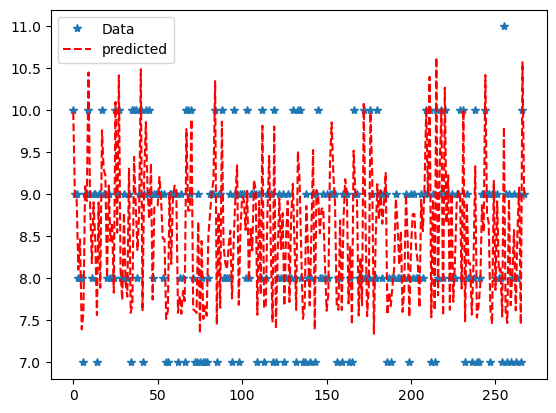

In [136]:
obsno=np.arange(0,268,1)
fig,ax=plt.subplots()
ax.plot(obsno,y_test,'*',label='Data')
ax.plot(obsno,y_pred,'r--',label='predicted')
ax.legend(loc='best')

## Lasso Regression and Ridge Regression 

In [137]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2,random_state=1)

In [138]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,15,10,20,30,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train1,y_train1)

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train1,y_train1)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-08}
-0.2702864431525095


In [139]:
prediction_lasso=lasso_regressor.predict(X_test1)
prediction_ridge=ridge_regressor.predict(X_test1)

### Evaluation Metrics

### Lasso Regression

In [140]:
from sklearn import metrics
print('Mean Absolute Error Lasso =',np.exp(metrics.mean_absolute_error(y_test1,prediction_lasso)))
print('Mean Squared Error Lasso =',np.exp(metrics.mean_squared_error(y_test1,prediction_lasso)))
print('Root Mean Squared Error Lasso =',np.exp(np.sqrt(metrics.mean_squared_error(y_test1,prediction_lasso))))
print('R-Squared = ',r2_score(y_test,prediction_lasso))


# Calculate adjusted R-squared
r_squared = r2_score(y_test,prediction_lasso)
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Adjusted R-squared score: ", adj_r_squared)

Mean Absolute Error Lasso = 1.4340607253003375
Mean Squared Error Lasso = 1.268254647404698
Root Mean Squared Error Lasso = 1.6282161639371362
R-Squared =  0.7357345834682887
Adjusted R-squared score:  0.7232985638667964


### Ridge Regression

In [141]:
from sklearn import metrics
print('Mean Absolute Error Lasso =',np.exp(metrics.mean_absolute_error(y_test1,prediction_ridge)))
print('Mean Squared Error Lasso =',np.exp(metrics.mean_squared_error(y_test1,prediction_ridge)))
print('Root Mean Squared Error Lasso =',np.exp(np.sqrt(metrics.mean_squared_error(y_test1,prediction_ridge))))
print('R-Squared = ',r2_score(y_test,prediction_ridge))


# Calculate adjusted R-squared
r_squared = r2_score(y_test,prediction_ridge)
n = X_test.shape[0]  # Number of samples in the test set
p = X_test.shape[1]  # Number of features
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print("Adjusted R-squared score: ", adj_r_squared)

Mean Absolute Error Lasso = 1.4340619368894898
Mean Squared Error Lasso = 1.268252605348151
Root Mean Squared Error Lasso = 1.6282134749866575
R-Squared =  0.7357363739892218
Adjusted R-squared score:  0.7233004386475381


In [142]:
Lasso_Result = pd.DataFrame({'Actual':np.exp(y_test1),'Predicted':np.exp(prediction_lasso),'Variance':np.exp(y_test1)-np.exp(prediction_lasso)})
Lasso_Result.head()

,Actual,Predicted,Variance
628,22026.465795,20471.144291,1555.321504
1086,8103.083928,7737.105743,365.978184
283,8103.083928,9847.166810,-1744.082882
789,2980.957987,4018.799199,-1037.841212
593,2980.957987,3875.642245,-894.684258


In [143]:
Ridge_Result = pd.DataFrame({'Actual':np.exp(y_test1),'Predicted':np.exp(prediction_ridge),'Variance':np.exp(y_test1)-np.exp(prediction_ridge)})
Ridge_Result.head()

,Actual,Predicted,Variance
628,22026.465795,20470.017971,1556.447824
1086,8103.083928,7736.601059,366.482869
283,8103.083928,9846.966001,-1743.882073
789,2980.957987,4018.217785,-1037.259798
593,2980.957987,3876.221673,-895.263686


## Assemption

# 1 _Normality

**make histogram of residuals**

**And check whether its approximately
bell-shaped, symmetrical**

**The error should be normally distributed**

actual = y_test
prediction = y_pred

residuals = actual - prediction
residuals

a = model_2.resid

sns.distplot(a)

plt.figure(figsize=(12,10))
sns.distplot(residuals, color='skyblue')
plt.title('Histogram of Residuals')
plt.ylabel('Prob')
plt.xlabel('Residuals')
plt.show()

# 

# 

#  2_Linearity

**Make scatter plots,**

**x = each continuous predictor
one by one**

**y = response variable**

**see whether a linear relationship is visible?**

In [144]:
sns.pamirplot(ols_train1)

AttributeError: module 'seaborn' has no attribute 'pamirplot'

# 

# 3_Independence of observation
**Make scatter plot,**

**x = obsno**

**y = residuals**

**if, no geometric pattern is visible,
assumption of INDEPENDENCE OF ERROR is holding good and 
not violated**

residuals.shape

obs=np.arange(268)
obsno = pd.DataFrame(obs)

plt.figure(figsize=(12,10))
sns.scatterplot(x = obs, y = residuals, palette='spring_r', color='darkslateblue', markers='+')
plt.title('Scatterplot of obsno vs residuals')

# 

# 4_Constant Error Variance [homoscadasticity]

**Make scatter plot,**

**x = predict**

**y = residuals**

**if, no geometric pattern is visible,
assumption of homoscadasticity is holding good and 
not violated**


plt.figure(figsize=(12,10))
sns.scatterplot(x = prediction, y = residuals, palette='spring', color='teal')
plt.title('Scatterplot of predict vs residuals')

# 

# 5_VIF

ols_train1.columns

ols_train1

ols_train1[['yes','northwest','southeast','southwest']] = ols_train1[['yes','northwest','southeast','southwest']].astype('int')

ols_train1

from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe


from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
x1=ols_train1.loc[:,['age','bmi','children','yes','southeast','southwest']]
vif_data=pd.DataFrame()
vif_data['feature']=x1.columns

# calculating VIF for each features
vif_data['VIF']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
print(vif_data)

# 6_Durbin Watson

The Durbin-Watson test statistic is calculated based on the residuals of the regression model. It takes values between 0 and 4, where:

1. A value of 2 indicates no autocorrelation (the residuals are independent).                
2. A value less than 2 suggests positive autocorrelation (the residuals are positively correlated).             
3. A value greater than 2 suggests negative autocorrelation (the residuals are negatively correlated).       

# import numpy and statsmodels for durbin watson

import numpy as np
from statsmodels.stats.stattools import durbin_watson

darbin_watson = durbin_watson(model_2.resid)


print("Durbin Watson Value :", round(darbin_watson, 3))